## DIANNA demo with Imagenet

This notebook showcases the use of DIANNA on a Resnet network trained on a subset of the Imagenet dataset, containing 1000 categories.

#### Install and import packages

In [1]:
#!pip install git+https://github.com/dianna-ai/dianna.git

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

np.random.seed(42)

In [3]:
# for google colab: clone and cd into the repository directory
try:
    import google.colab
    colab = True
except ImportError:
    colab = False
    
if colab:
    ! git clone https://github.com/loostrum/dianna_demo.git
    os.chdir('dianna_demo')

data_path = 'data/bee.jpg'

#### Define model and helper functions

In [4]:
class Model():
    def __init__(self):
        K.set_learning_phase(0)
        self.model = ResNet50()
        self.input_size = (224, 224)
        
    def run_on_batch(self, x):
        return self.model.predict(x)
    
model = Model()

/Users/loostrum/pyenv/versions/3.9.1/envs/dianna/lib/python3.9/site-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
2022-08-30 13:29:16.898527: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def load_img(path):
    img = image.load_img(path, target_size=model.input_size)
    x = image.img_to_array(img)
    x = preprocess_input(x)
    return img, x

In [6]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

#### Run model on example data

(-0.5, 223.5, 223.5, -0.5)

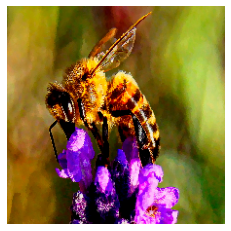

In [7]:
img, scaled_img = load_img(data_path)
plt.imshow(img)
plt.axis('off')

In [8]:
sorted_classes = np.argsort(model.model.predict(np.expand_dims(scaled_img, 0)))[0][::-1]
print('\n'.join(['{:4} {}'.format(c, class_name(c)) for c in sorted_classes[:10]]))

1/1 [==============================] - 1s 858ms/step
 309 bee
 946 cardoon
 308 fly
 319 dragonfly
  74 garden_spider
 321 admiral
 324 cabbage_butterfly
 318 lacewing
 815 spider_web
 323 monarch


## Explainable AI with DIANNA

In [9]:
import dianna

In [10]:
axis_labels = {-1: 'channels'}
labels = sorted_classes[:10]  # get an explanation for the top 10 labels
heatmaps = dianna.explain_image(model.run_on_batch, scaled_img, method='RISE',
                                axis_labels=axis_labels, labels=labels)

2/2 [==============================] - 2s 738ms/step
Rise parameter p_keep was automatically determined at 0.1


Explaining:   0%|                                                                                    | 0/10 [00:00<?, ?it/s]

4/4 [==============================] - 4s 891ms/step


Explaining:  10%|███████▌                                                                    | 1/10 [00:04<00:36,  4.03s/it]

4/4 [==============================] - 4s 845ms/step


Explaining:  20%|███████████████▏                                                            | 2/10 [00:07<00:30,  3.87s/it]

4/4 [==============================] - 4s 844ms/step


Explaining:  30%|██████████████████████▊                                                     | 3/10 [00:11<00:26,  3.80s/it]

4/4 [==============================] - 4s 842ms/step


Explaining:  40%|██████████████████████████████▍                                             | 4/10 [00:15<00:22,  3.79s/it]

4/4 [==============================] - 4s 853ms/step


Explaining:  50%|██████████████████████████████████████                                      | 5/10 [00:19<00:18,  3.79s/it]

4/4 [==============================] - 4s 849ms/step


Explaining:  60%|█████████████████████████████████████████████▌                              | 6/10 [00:22<00:15,  3.78s/it]

4/4 [==============================] - 4s 858ms/step


Explaining:  70%|█████████████████████████████████████████████████████▏                      | 7/10 [00:26<00:11,  3.79s/it]

4/4 [==============================] - 4s 859ms/step


Explaining:  80%|████████████████████████████████████████████████████████████▊               | 8/10 [00:30<00:07,  3.80s/it]

4/4 [==============================] - 4s 848ms/step


Explaining:  90%|████████████████████████████████████████████████████████████████████▍       | 9/10 [00:34<00:03,  3.79s/it]

4/4 [==============================] - 4s 866ms/step


Explaining: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


For each class (1000 in this case), an explanation with a shape equal to the input image is generated.

In [11]:
print(heatmaps.shape)

(10, 224, 224)


The explanations can be considered images and can be plotted with e.g. `matplotlib`.  
DIANNA also includes visualization tools.

In [12]:
from dianna.visualization import plot_image

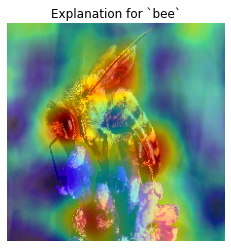

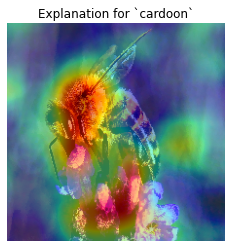

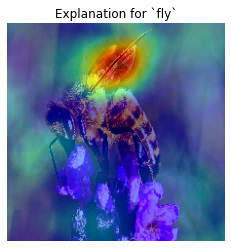

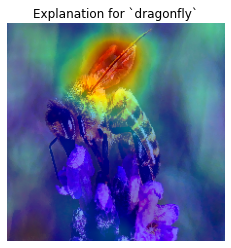

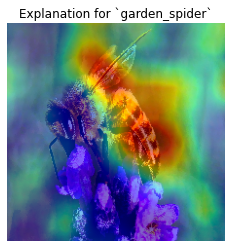

In [13]:
for idx, current_class_id in enumerate(sorted_classes[:5]):
    plot_image(heatmaps[idx], original_data=image.img_to_array(img)/255., heatmap_cmap='jet', show_plot=False)
    plt.title(f'Explanation for `{class_name(current_class_id)}`')
    plt.axis('off')

Note that in these plots, red means important and blue means unimportant.